<a href="https://colab.research.google.com/github/salsaputrii/multi-label-text-classification/blob/main/Final_Project_Pengolahan_Bahasa_Alami_Kelompok_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Multi Label Classification* Teks Konsultasi Tumor Otak dan Kanker Otak Forum Alodokter**

*   Isna Aulia Fadilla Norsi (05211940000006)
*   Indira Salsabila Ardan   (05211940000046)
*   Salsa Putri Islammia     (05211940000064)



# Library dan Dataset

In [ ]:
#Import library
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.preprocessing import text, sequence

# import dataset
df = pd.read_csv("/content/DatasetTerformat_Kelompok_4_Konten (3).csv", encoding = "ISO-8859-1")
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,No,Kalimat,Pasien,Usia Pasien,Penyakit,Gejala,Kapan,Periode,Tindakan,Outcome,...,Penyebab,Prakondisi,Objek,Penutup,Referensi,Artikel,Observasi,Kondisi,Pengukuran,Predikat
0,1,"Sore dok, saya sering sakit kepala kalau ada a...",1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,0,0,0,0,0,0
1,2,"Hari hari saya slalu pelupa, dan kurang konsen...",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,3,"Halo Ummu, terima kasih telah bertanya di Alod...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,4,"Keluhan yang anda alami berupa sering lupa, ku...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,0,0,0,0,0,0
4,5,Insomnia atau kesulitan tidur sendiri adalah s...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0


In [ ]:
# ngubah tipe data float ke int value beberapa kolom
df['Pasien'] = pd.to_numeric(df['Pasien'], errors='coerce').fillna(0).astype(int)
df['Usia Pasien'] = pd.to_numeric(df['Usia Pasien'], errors='coerce').fillna(0).astype(int)
df['Penyakit'] = pd.to_numeric(df['Penyakit'], errors='coerce').fillna(0).astype(int)
df['Gejala'] = pd.to_numeric(df['Gejala'], errors='coerce').fillna(0).astype(int)
df['Kapan'] = pd.to_numeric(df['Kapan'], errors='coerce').fillna(0).astype(int)
df['Periode'] = pd.to_numeric(df['Periode'], errors='coerce').fillna(0).astype(int)
df['Tindakan'] = pd.to_numeric(df['Tindakan'], errors='coerce').fillna(0).astype(int)
df['Outcome'] = pd.to_numeric(df['Outcome'], errors='coerce').fillna(0).astype(int)
df['Pertanyaan'] = pd.to_numeric(df['Pertanyaan'], errors='coerce').fillna(0).astype(int)
df['Pembuka'] = pd.to_numeric(df['Pembuka'], errors='coerce').fillna(0).astype(int)
df['Penyebab'] = pd.to_numeric(df['Penyebab'], errors='coerce').fillna(0).astype(int)
df['Prakondisi'] = pd.to_numeric(df['Prakondisi'], errors='coerce').fillna(0).astype(int)
df['Objek'] = pd.to_numeric(df['Objek'], errors='coerce').fillna(0).astype(int)

df.head()

,No,Kalimat,Pasien,Usia Pasien,Penyakit,Gejala,Kapan,Periode,Tindakan,Outcome,...,Penyebab,Prakondisi,Objek,Penutup,Referensi,Artikel,Observasi,Kondisi,Pengukuran,Predikat
0,1,"Sore dok, saya sering sakit kepala kalau ada a...",1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,"Hari hari saya slalu pelupa, dan kurang konsen...",0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,"Halo Ummu, terima kasih telah bertanya di Alod...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"Keluhan yang anda alami berupa sering lupa, ku...",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,Insomnia atau kesulitan tidur sendiri adalah s...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Exploratory Data Analysis (EDA)
**Disclaimer: Tag = Label**

## Jumlah Kalimat Per Tag







In [ ]:
# visualisasi dalam tabel
df_clean = df.drop(['No', 'Kalimat'], axis=1)
counts = []
categories = list(df_clean.columns.values)
for i in categories:
    counts.append((i, df_clean[i].sum()))
df_stats = pd.DataFrame(counts, columns=['Tag', 'Jumlah_Kalimat'])
df_stats.sort_values('Jumlah_Kalimat', ascending=False)

,Tag,Jumlah_Kalimat
2,Penyakit,323
6,Tindakan,282
3,Gejala,176
7,Outcome,113
8,Pertanyaan,107
10,Penyebab,106
11,Prakondisi,100
13,Penutup,90
9,Pembuka,77
0,Pasien,67


Text(0.5, 0, 'Tag')

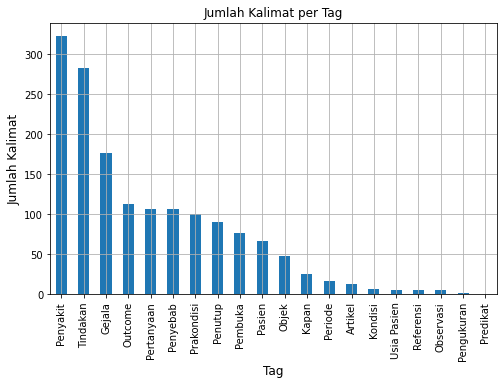

In [ ]:
# visualisasi
df_stats.sort_values('Jumlah_Kalimat', ascending=False).plot(x='Tag', y='Jumlah_Kalimat', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Jumlah Kalimat per Tag")
plt.ylabel('Jumlah Kalimat', fontsize=12)
plt.xlabel('Tag', fontsize=12)

**Hasil Analisis**
*   Melihat berapa banyak kalimat yang ada di setiap tag
*   Tag yang memiliki jumlah kalimat terbanyak adalah Penyakit (323), Tindakan (282), dan Gejala (176)
*   Tag yang memiliki jumlah kalimat paling sedikit adalah Predikat (1), Pengukuran (2), Observasi (5), dan Referensi (5)



## Jumlah Tag Per Kalimat





In [ ]:
#visualisasi tabel
rowsums = df.iloc[:,2:].sum(axis=1)
x=pd.DataFrame(rowsums.value_counts(), columns=['Jumlah Kalimat'])
x

,Jumlah Kalimat
1,525
2,269
3,111
0,57
4,21
5,8
6,6
8,1
7,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Jumlah Tag')

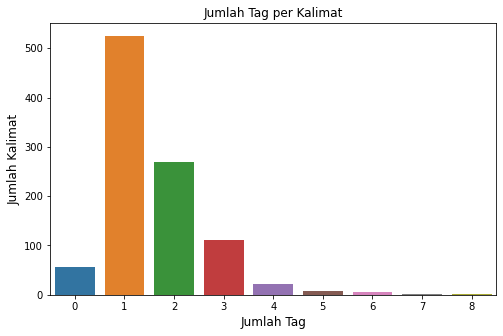

In [ ]:
# visualisasi barchart
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Jumlah Tag per Kalimat")
plt.ylabel('Jumlah Kalimat', fontsize=12)
plt.xlabel('Jumlah Tag', fontsize=12)

In [ ]:
# kalimat tidak belabel = kalimat dengan 0 label
print('Persentase kalimat yang tidak memiliki tag:')
print(len(df[(df['Pasien']==0) & (df['Usia Pasien']==0) & (df['Penyakit']==0) & (df['Gejala']== 0) & (df['Kapan']==0) & (df['Periode']==0) & (df['Tindakan']==0) & (df['Outcome']==0) & (df['Pertanyaan']==0) & (df['Pembuka']==0) & (df['Penyebab']==0) & (df['Prakondisi']==0) & (df['Objek']==0) & (df['Penutup']==0) & (df['Referensi']==0) & (df['Artikel']==0) & (df['Observasi']==0) & (df['Kondisi']==0) & (df['Pengukuran']==0) & (df['Predikat']==0)]) / len(df))

Persentase kalimat yang tidak memiliki tag:
0.057057057057057055


**Hasil Analisis**
*   Melihat berapa banyak kalimat yang memiliki tag lebih dari 1
*   Melihat berapa banyak kalimat yang memiliki tidak memiliki tag
*   Mayoritas kalimat memiliki 1 tag, yaitu sebanyak 512 kalimat
*   Terdapat 57 kalimat yang tidak memiliki tag atau sebanyak 5,7% dari seluruh data

## Panjang Karakter Per Kalimat

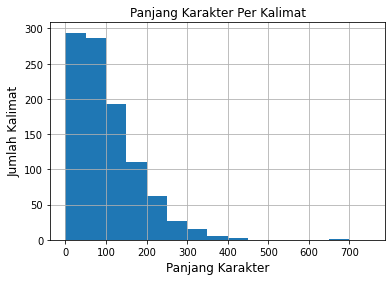

In [ ]:
lens = df.Kalimat.str.len()
lens.hist(bins = np.arange(0,800,50))
plt.title('Panjang Karakter Per Kalimat')
plt.ylabel('Jumlah Kalimat', fontsize=12)
plt.xlabel('Panjang Karakter', fontsize=12)
plt.show()

**Hasil Analisis**
*   Melihat persebaran panjang karakter pada setiap kalimat
*   Mayoritas kalimat memiliki panjang karakter kurang dari 200 karakter
*   Terdapat pencilan yaitu kalimat yang memiliki jumlah karakter mendekati 700 karakter

## Periksa Missing Value di Kolom Kalimat

In [ ]:
print('Jumlah missing value di kolom kalimat:')
df['Kalimat'].isnull().sum()

Jumlah missing value di kolom kalimat:


0

**Hasil Analisis**
*   Melihat apakah ada kolom yang tidak memiliki nilai (kosong)
*   Semua kolom memiliki nilai

## *Correlation Matrix*

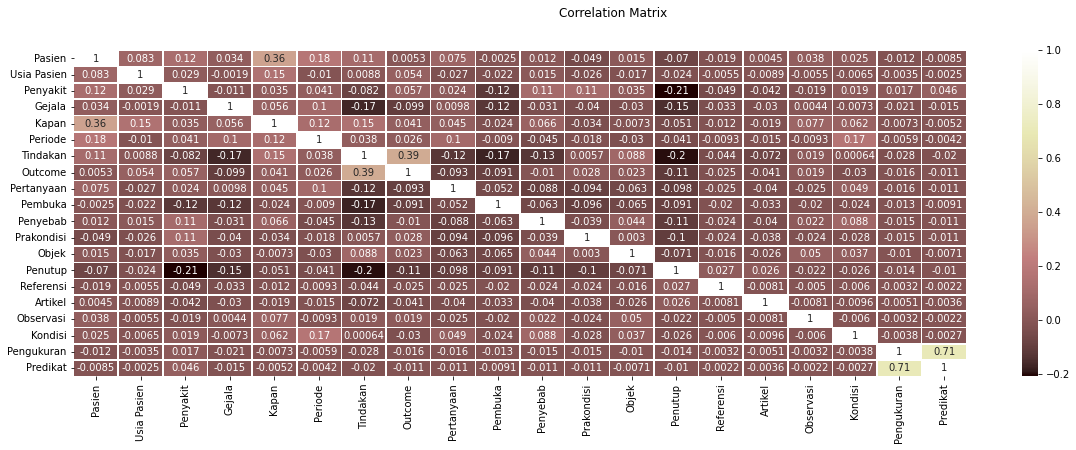

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap="pink", linewidths=.5, ax=ax)

**Hasil Analisis**
*   Melihat korelasi antara tag
*   Semakin terang warnanya berarti semakin tinggi korelasi setiap tag
*   Selain dengan dirinya sendiri, korelasi paling tinggi dimiliki oleh tag Pengukuran dengan Predikat, Outcome dengan Tindakan, dan Pasien dengan Kapan
*   Semakin gelap warnanya berarti semakin rendah korelasi setiap tag
*   Tag yang memiliki korelasi terendah adalah Penyakit dengan Penutup, Tindakan dengan Penutup, dan Tindakan dengan Gejala

## Word Cloud

In [ ]:
# karena ketiga tag di bawah mempunyai jumlah kalimat terbanyak
top_3_tags = ['Penyakit','Tindakan','Gejala']

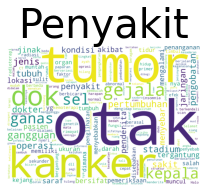

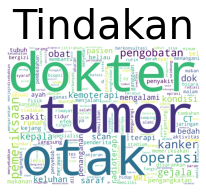

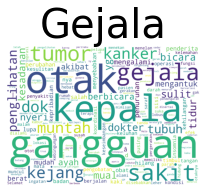

In [ ]:
from wordcloud import WordCloud

index_subplot = 1

for label in top_3_tags:  
  plt.figure(figsize=(20,6))
  subset = df[df[label]==1]
  text = subset.iloc[:,1].values
  cloud_label = WordCloud(
                            stopwords=stop_words,
                            background_color='white',
                            collocations=False,
                            width=2500,
                            height=1800
                          ).generate(" ".join(text))
  
  # plt.subplot(4, 5, index_subplot)
  plt.subplot(1, 5, index_subplot)
  plt.axis('off')
  plt.title(label,fontsize=40)
  plt.imshow(cloud_label)
  plt.show()

  index_subplot=+1

**Hasil Analisis**
*   Melihat kata yang paling sering muncul pada 3 tag yang memiliki jumlah kalimat terbanyak
*   Pada tag Penyakit, kata yang paling sering muncul adalah Otak, Kanker, dan Tumor
*   Pada tag Tindakan, kata yang paling sering muncul adalah Tumor, Dokter, dan Otak
*   Pada tag Gejala, kata yang paling sering muncul adalah Gangguan, Kepala, dan Otak

# Data Preprocessing

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\W', ' ', text) # hapus special char
    text = re.sub('\s+', ' ', text) # mengubah enter/tab jadi spasi
    text = text.strip(' ') # hapus spasi berlebih
    return text

In [ ]:
# contoh clean text
df['Kalimat'] = df['Kalimat'].map(lambda com : clean_text(com))
df['Kalimat'][0]

'sore dok saya sering sakit kepala kalau ada aktivitas diluar ruangan seperti di kampus dll'

In [ ]:
# split jadi 80:20
tags = ['Pasien', 'Usia Pasien', 'Penyakit', 'Gejala', 'Kapan', 'Periode', 'Tindakan', 'Outcome', 'Pertanyaan', 'Pembuka', 'Penyebab', 'Prakondisi', 'Objek', 'Penutup', 'Referensi', 'Artikel', 'Observasi', 'Kondisi', 'Pengukuran', 'Predikat'] 
train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True)
X_train = train.Kalimat
X_test = test.Kalimat
print(X_train.shape)
print(X_test.shape)

(799,)
(200,)


In [ ]:
#menyesuaikan kbbi
nonkbbi = ['dll', 'konsen', 'slalu', 'tapi', 'emang', 'tks', 'karna', 'resiko', 'oprasi', 'udah', 'mngerti', 'gentik', 'serinh', 'sy', 'hp', 'syaraf', 'diagnosa', 'dkt', 'akhir2', 'trus', 'gak', 'makin', 'gimana', 'nyambung', 'dtg', 'mgg', 'klo', 'radioteraphy', 'pakaiana', 'mengkonsumsi']

kbbi = ['dan lain-lain', 'konsentrasi', 'selalu', 'tetapi', 'memang', 'terima kasih', 'karena', 'risiko', 'operasi', 'sudah', 'mengerti', 'genetik', 'sering', 'saya', 'handphone', 'saraf', 'diagnosis', 'dekat', 'akhir-akhir', 'terus', 'tidak', 'semakin', 'bagaimana', 'sambung', 'datang', 'minggu', 'kalau', 'radioterapi', 'pakaian', 'mengonsumsi']

dictkbbi = dict(zip(nonkbbi, kbbi))

import itertools
dict(itertools.islice(dictkbbi.items(), 5))

{'dll': 'dan lain-lain',
 'konsen': 'konsentrasi',
 'slalu': 'selalu',
 'tapi': 'tetapi',
 'emang': 'memang'}

In [ ]:
# clean text setelah disesuaikan kbbi
df['Kalimat sesuai KBBI'] = df['Kalimat'].str.lower().apply(lambda row: " ".join(dictkbbi[w] if w.lower() in dictkbbi else w for w in row.split()))
df['Kalimat sesuai KBBI']  = df['Kalimat sesuai KBBI'].map(lambda com : clean_text(com))
df['Kalimat sesuai KBBI']

0      sore dok saya sering sakit kepala kalau ada ak...
1      hari hari saya selalu pelupa dan kurang konsen...
2      halo ummu terima kasih telah bertanya di alodo...
3      keluhan yang anda alami berupa sering lupa kur...
4      insomnia atau kesulitan tidur sendiri adalah s...
                             ...                        
994                                           kemoterapi
995                                          radioterapi
996    kematian akan terjadi apabila tumor otak tidak...
997    klik artikel di bawah ini yang sesuai dengan p...
998    demikian penjelasan yang dapat kami sampaikan ...
Name: Kalimat sesuai KBBI, Length: 999, dtype: object

# Training

## Algoritma Machine Learning

### Naive Bayes

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=False, class_prior=None))),
            ])

NB_accuracy = []
NB_f1score = []
NB_precision = []
NB_recall = []

for tag in tags:
    print('... Processing {}'.format(tag))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[tag])
    # compute the testing metrics
    prediction = NB_pipeline.predict(X_test)
    NB_accuracy.extend([accuracy_score(test[tag], prediction)])
    NB_f1score.extend([f1_score(test[tag], prediction)])
    NB_precision.extend([precision_score(test[tag], prediction)])
    NB_recall.extend([recall_score(test[tag], prediction)])

NB_result = pd.DataFrame({'Label':categories,
                          'Accuracy':NB_accuracy,'F1-Score':NB_f1score, 
                          'Precision':NB_precision,'Recall':NB_recall})
print('\n Test Naive Bayes Result:\n')
NB_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


... Processing Penyebab
... Processing Prakondisi
... Processing Objek
... Processing Penutup
... Processing Referensi
... Processing Artikel
... Processing Observasi
... Processing Kondisi
... Processing Pengukuran
... Processing Predikat

 Test Naive Bayes Result:



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.915,0.260870,0.300000,0.230769
1,Usia Pasien,0.950,0.000000,0.000000,0.000000
2,Penyakit,0.745,0.666667,0.554348,0.836066
3,Gejala,0.890,0.702703,0.684211,0.722222
4,Kapan,0.935,0.000000,0.000000,0.000000
5,Periode,0.960,0.000000,0.000000,0.000000
6,Tindakan,0.870,0.775862,0.762712,0.789474
7,Outcome,0.830,0.260870,0.240000,0.285714
8,Pertanyaan,0.875,0.444444,0.434783,0.454545
9,Pembuka,0.965,0.758621,0.611111,1.000000


In [ ]:
nb_acc_mean = NB_result.Accuracy.mean()
nb_prec_mean = NB_result["Precision"].mean()
nb_rec_mean = NB_result["Recall"].mean()
nb_f1_mean = NB_result["F1-Score"].mean()

print("Rata-rata Accuracy: ", nb_acc_mean)
print("Rata-rata Precision: ", nb_prec_mean)
print("Rata-rata Recall: ", nb_rec_mean)
print("Rata-rata F1-Score: ", nb_f1_mean)

Rata-rata Accuracy:  0.9152500000000001
Rata-rata Precision:  0.28287219014743936
Rata-rata Recall:  0.33859358418626045
Rata-rata F1-Score:  0.30389390510080166


### LinearSVC

In [ ]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(C=0.2,dual=False, class_weight='balanced', random_state=42), n_jobs=1)),
            ])

SVC_accuracy = []
SVC_f1score = []
SVC_precision = []
SVC_recall = []

for tag in tags:
    print('... Processing {}'.format(tag))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[tag])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    SVC_accuracy.extend([accuracy_score(test[tag], prediction)])
    SVC_f1score.extend([f1_score(test[tag], prediction)])
    SVC_precision.extend([precision_score(test[tag], prediction)])
    SVC_recall.extend([recall_score(test[tag], prediction)])

SVC_result = pd.DataFrame({'Label':categories,
                            'Accuracy':SVC_accuracy,'F1-Score':SVC_f1score, 
                            'Precision':SVC_precision,'Recall':SVC_recall})
print('\nTest LinearSVC Result:\n')
SVC_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Objek
... Processing Penutup
... Processing Referensi
... Processing Artikel
... Processing Observasi
... Processing Kondisi
... Processing Pengukuran
... Processing Predikat

Test LinearSVC Result:



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.900,0.411765,0.333333,0.538462
1,Usia Pasien,0.990,0.000000,0.000000,0.000000
2,Penyakit,0.865,0.787402,0.757576,0.819672
3,Gejala,0.895,0.712329,0.702703,0.722222
4,Kapan,0.950,0.000000,0.000000,0.000000
5,Periode,0.990,0.000000,0.000000,0.000000
6,Tindakan,0.870,0.779661,0.754098,0.807018
7,Outcome,0.835,0.377358,0.312500,0.476190
8,Pertanyaan,0.890,0.541667,0.500000,0.590909
9,Pembuka,0.985,0.880000,0.785714,1.000000


In [ ]:
svc_acc_mean = SVC_result.Accuracy.mean()
svc_prec_mean = SVC_result["Precision"].mean()
svc_rec_mean = SVC_result["Recall"].mean()
svc_f1_mean = SVC_result["F1-Score"].mean()

print("Rata-rata Accuracy: ", svc_acc_mean)
print("Rata-rata Precision: ", svc_prec_mean)
print("Rata-rata Recall: ", svc_rec_mean)
print("Rata-rata F1-Score: ", svc_f1_mean)

Rata-rata Accuracy:  0.9404999999999999
Rata-rata Precision:  0.3623754446769977
Rata-rata Recall:  0.48469844005549223
Rata-rata F1-Score:  0.4013010715680722


### Logistic Regression

In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(C=0.1,class_weight='balanced', dual=False, solver='sag'), n_jobs=1)),
            ])

LogReg_accuracy = []
LogReg_f1score = []
LogReg_precision = []
LogReg_recall = []

for tag in tags:
    print('... Processing {}'.format(tag))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[tag])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)

    LogReg_accuracy.extend([accuracy_score(test[tag], prediction)])
    LogReg_f1score.extend([f1_score(test[tag], prediction)])
    LogReg_precision.extend([precision_score(test[tag], prediction)])
    LogReg_recall.extend([recall_score(test[tag], prediction)])

LogReg_result = pd.DataFrame({'Label':categories,
                              'Accuracy':LogReg_accuracy,'F1-Score':LogReg_f1score, 
                              'Precision':LogReg_precision,'Recall':LogReg_recall})
print('\n Test LogReg Result:\n')
LogReg_result

... Processing Pasien
... Processing Usia Pasien


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Objek
... Processing Penutup
... Processing Referensi
... Processing Artikel
... Processing Observasi
... Processing Kondisi
... Processing Pengukuran
... Processing Predikat

 Test LogReg Result:



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.865,0.372093,0.266667,0.615385
1,Usia Pasien,0.970,0.000000,0.000000,0.000000
2,Penyakit,0.845,0.763359,0.714286,0.819672
3,Gejala,0.895,0.712329,0.702703,0.722222
4,Kapan,0.905,0.095238,0.062500,0.200000
5,Periode,0.980,0.333333,0.250000,0.500000
6,Tindakan,0.875,0.786325,0.766667,0.807018
7,Outcome,0.805,0.338983,0.263158,0.476190
8,Pertanyaan,0.900,0.600000,0.535714,0.681818
9,Pembuka,0.975,0.814815,0.687500,1.000000


In [ ]:
logreg_acc_mean = LogReg_result.Accuracy.mean()
logreg_prec_mean = LogReg_result["Precision"].mean()
logreg_rec_mean = LogReg_result["Recall"].mean()
logreg_f1_mean = LogReg_result["F1-Score"].mean()

print("Rata-rata Accuracy: ", logreg_acc_mean)
print("Rata-rata Precision: ", logreg_prec_mean)
print("Rata-rata Recall: ", logreg_rec_mean)
print("Rata-rata F1-Score: ", logreg_f1_mean)

Rata-rata Accuracy:  0.9092499999999999
Rata-rata Precision:  0.35905691876086615
Rata-rata Recall:  0.5402653731224254
Rata-rata F1-Score:  0.41574424701266227


### Decision Tree

In [ ]:
DT_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(), n_jobs=1)),
            ])

DT_accuracy = []
DT_f1score = []
DT_precision = []
DT_recall = []

for tag in tags:
    print('... Processing {}'.format(tag))
    # train the model using X_dtm & y
    DT_pipeline.fit(X_train, train[tag])
    # compute the testing accuracy
    prediction = DT_pipeline.predict(X_test)

    DT_accuracy.extend([accuracy_score(test[tag], prediction)])
    DT_f1score.extend([f1_score(test[tag], prediction)])
    DT_precision.extend([precision_score(test[tag], prediction)])
    DT_recall.extend([recall_score(test[tag], prediction)])

DT_result = pd.DataFrame({'Label':categories,
                              'Accuracy':DT_accuracy,'F1-Score':DT_f1score, 
                              'Precision':DT_precision,'Recall':DT_recall})
print('\n Test DT Result:\n')
DT_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Objek
... Processing Penutup
... Processing Referensi
... Processing Artikel
... Processing Observasi
... Processing Kondisi
... Processing Pengukuran
... Processing Predikat

 Test DT Result:



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.920,0.333333,0.363636,0.307692
1,Usia Pasien,0.970,0.000000,0.000000,0.000000
2,Penyakit,0.860,0.770492,0.770492,0.770492
3,Gejala,0.880,0.647059,0.687500,0.611111
4,Kapan,0.960,0.000000,0.000000,0.000000
5,Periode,0.970,0.000000,0.000000,0.000000
6,Tindakan,0.845,0.699029,0.782609,0.631579
7,Outcome,0.850,0.210526,0.235294,0.190476
8,Pertanyaan,0.895,0.432432,0.533333,0.363636
9,Pembuka,0.980,0.833333,0.769231,0.909091


In [ ]:
DT_acc_mean = DT_result.Accuracy.mean()
DT_prec_mean = DT_result["Precision"].mean()
DT_rec_mean = DT_result["Recall"].mean()
DT_f1_mean = DT_result["F1-Score"].mean()

print("Rata-rata Accuracy: ", DT_acc_mean)
print("Rata-rata Precision: ", DT_prec_mean)
print("Rata-rata Recall: ", DT_rec_mean)
print("Rata-rata F1-Score: ", DT_f1_mean)

Rata-rata Accuracy:  0.9404999999999999
Rata-rata Precision:  0.38213399390500125
Rata-rata Recall:  0.3720120048819993
Rata-rata F1-Score:  0.362922309135471


### K-Nearest Neighbors (KNN)

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
KNN_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(KNeighborsClassifier(
                                            n_neighbors=5, weights='uniform', 
                                            algorithm='auto', leaf_size=30, p=2,
                                            metric='minkowski', metric_params=None, 
                                            n_jobs=None)))
            ])

KNN_accuracy = []
KNN_f1score = []
KNN_precision = []
KNN_recall = []

for tag in tags:
    print('... Processing {}'.format(tag))
    # train the model using X_dtm & y
    KNN_pipeline.fit(X_train, train[tag])
    # compute the testing metrics
    prediction = KNN_pipeline.predict(X_test)
    KNN_accuracy.extend([accuracy_score(test[tag], prediction)])
    KNN_f1score.extend([f1_score(test[tag], prediction)])
    KNN_precision.extend([precision_score(test[tag], prediction)])
    KNN_recall.extend([recall_score(test[tag], prediction)])

KNN_result = pd.DataFrame({'Label':categories,
                          'Accuracy':KNN_accuracy,'F1-Score':KNN_f1score, 
                          'Precision':KNN_precision,'Recall':KNN_recall})
print('\n Test KNN Result:\n')
KNN_result

... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Objek
... Processing Penutup
... Processing Referensi
... Processing Artikel
... Processing Observasi
... Processing Kondisi
... Processing Pengukuran
... Processing Predikat

 Test KNN Result:



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and

,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.950,0.375000,1.000000,0.230769
1,Usia Pasien,0.995,0.000000,0.000000,0.000000
2,Penyakit,0.780,0.650794,0.630769,0.672131
3,Gejala,0.920,0.741935,0.884615,0.638889
4,Kapan,0.970,0.000000,0.000000,0.000000
5,Periode,0.990,0.000000,0.000000,0.000000
6,Tindakan,0.830,0.679245,0.734694,0.631579
7,Outcome,0.890,0.214286,0.428571,0.142857
8,Pertanyaan,0.895,0.322581,0.555556,0.227273
9,Pembuka,0.980,0.833333,0.769231,0.909091


In [ ]:
knn_acc_mean = KNN_result.Accuracy.mean()
knn_prec_mean = KNN_result["Precision"].mean()
knn_rec_mean = KNN_result["Recall"].mean()
knn_f1_mean = KNN_result["F1-Score"].mean()

print("Rata-rata Accuracy: ", knn_acc_mean)
print("Rata-rata Precision: ", knn_prec_mean)
print("Rata-rata Recall: ", knn_rec_mean)
print("Rata-rata F1-Score: ", knn_f1_mean)

Rata-rata Accuracy:  0.94525
Rata-rata Precision:  0.4170468123146695
Rata-rata Recall:  0.26230986731100925
Rata-rata F1-Score:  0.30210272466194715


### Gradient Boosting

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
GB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(GradientBoostingClassifier(
                                                          # loss='log_loss', 
                                                          learning_rate=0.1, 
                                                          n_estimators=100, subsample=1.0, 
                                                          criterion='friedman_mse', min_samples_split=2, 
                                                          min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                                          max_depth=3, min_impurity_decrease=0.0, 
                                                          init=None, random_state=None, max_features=None, 
                                                          verbose=0, max_leaf_nodes=None, warm_start=False, 
                                                          validation_fraction=0.1, n_iter_no_change=None, 
                                                          tol=0.0001, ccp_alpha=0.0)))
                ])

GB_accuracy = []
GB_f1score = []
GB_precision = []
GB_recall = []

for tag in tags:
    print('... Processing {}'.format(tag))
    # train the model using X_dtm & y
    GB_pipeline.fit(X_train, train[tag])
    # compute the testing metrics
    prediction = GB_pipeline.predict(X_test)
    GB_accuracy.extend([accuracy_score(test[tag], prediction)])
    GB_f1score.extend([f1_score(test[tag], prediction)])
    GB_precision.extend([precision_score(test[tag], prediction)])
    GB_recall.extend([recall_score(test[tag], prediction)])

GB_result = pd.DataFrame({'Label':categories,
                          'Accuracy':GB_accuracy,'F1-Score':GB_f1score, 
                          'Precision':GB_precision,'Recall':GB_recall})
print('\n Test GB Result:\n')
GB_result

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


... Processing Pasien
... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode
... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Objek
... Processing Penutup
... Processing Referensi
... Processing Artikel


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Observasi
... Processing Kondisi


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Re

... Processing Pengukuran
... Processing Predikat

 Test GB Result:



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.945,0.421053,0.666667,0.307692
1,Usia Pasien,0.970,0.000000,0.000000,0.000000
2,Penyakit,0.890,0.830769,0.782609,0.885246
3,Gejala,0.895,0.655738,0.800000,0.555556
4,Kapan,0.960,0.000000,0.000000,0.000000
5,Periode,0.985,0.000000,0.000000,0.000000
6,Tindakan,0.850,0.680851,0.864865,0.561404
7,Outcome,0.900,0.230769,0.600000,0.142857
8,Pertanyaan,0.895,0.275862,0.571429,0.181818
9,Pembuka,0.985,0.869565,0.833333,0.909091


In [ ]:
gb_acc_mean = GB_result.Accuracy.mean()
gb_prec_mean = GB_result["Precision"].mean()
gb_rec_mean = GB_result["Recall"].mean()
gb_f1_mean = GB_result["F1-Score"].mean()

print("Rata-rata Accuracy: ", gb_acc_mean)
print("Rata-rata Precision: ", gb_prec_mean)
print("Rata-rata Recall: ", gb_rec_mean)
print("Rata-rata F1-Score: ", gb_f1_mean)

Rata-rata Accuracy:  0.9487499999999999
Rata-rata Precision:  0.40859662174879574
Rata-rata Recall:  0.31139822502749465
Rata-rata F1-Score:  0.32452466359511456


### Random Forest

In [ ]:
RF_pipeline = Pipeline([
              ('tfidf', TfidfVectorizer(stop_words=stop_words)),
              ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=100, 
                                                                criterion='gini', max_depth=None, 
                                                                min_samples_split=2, min_samples_leaf=1, 
                                                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                                                bootstrap=True, oob_score=False, n_jobs=None, 
                                                                random_state=None, verbose=0, warm_start=False, 
                                                                class_weight=None, ccp_alpha=0.0, max_samples=None)))
            ])

RF_accuracy = []
RF_f1score = []
RF_precision = []
RF_recall = []

for tag in tags:
    print('... Processing {}'.format(tag))
    
    # train the model using X_dtm & y
    RF_pipeline.fit(X_train, train[tag])
    
    # compute the testing accuracy
    prediction = RF_pipeline.predict(X_test)
    
    RF_accuracy.extend([accuracy_score(test[tag], prediction)])
    RF_f1score.extend([f1_score(test[tag], prediction)])
    RF_precision.extend([precision_score(test[tag], prediction)])
    RF_recall.extend([recall_score(test[tag], prediction)])

RF_result = pd.DataFrame({'Label':categories,
                          'Accuracy':RF_accuracy,'F1-Score':RF_f1score, 
                          'Precision':RF_precision,'Recall':RF_recall})
print('\nRF Result:\n')
RF_result

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


... Processing Pasien


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Usia Pasien
... Processing Penyakit
... Processing Gejala
... Processing Kapan
... Processing Periode


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Tindakan
... Processing Outcome
... Processing Pertanyaan
... Processing Pembuka
... Processing Penyebab
... Processing Prakondisi
... Processing Objek
... Processing Penutup


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Referensi
... Processing Artikel


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Observasi
... Processing Kondisi


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... Processing Pengukuran
... Processing Predikat

RF Result:



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is

,Label,Accuracy,F1-Score,Precision,Recall
0,Pasien,0.935,0.000000,0.000000,0.000000
1,Usia Pasien,0.995,0.000000,0.000000,0.000000
2,Penyakit,0.865,0.787402,0.757576,0.819672
3,Gejala,0.905,0.707692,0.793103,0.638889
4,Kapan,0.975,0.000000,0.000000,0.000000
5,Periode,0.990,0.000000,0.000000,0.000000
6,Tindakan,0.875,0.742268,0.900000,0.631579
7,Outcome,0.890,0.000000,0.000000,0.000000
8,Pertanyaan,0.900,0.230769,0.750000,0.136364
9,Pembuka,0.985,0.869565,0.833333,0.909091


In [ ]:
rf_acc_mean = RF_result.Accuracy.mean()
rf_prec_mean = RF_result["Precision"].mean()
rf_rec_mean = RF_result["Recall"].mean()
rf_f1_mean = RF_result["F1-Score"].mean()

print("Rata-rata Accuracy: ", rf_acc_mean)
print("Rata-rata Precision: ", rf_prec_mean)
print("Rata-rata Recall: ", rf_rec_mean)
print("Rata-rata F1-Score: ", rf_f1_mean)

Rata-rata Accuracy:  0.9499999999999998
Rata-rata Precision:  0.32580776981639054
Rata-rata Recall:  0.2169497027247116
Rata-rata F1-Score:  0.2393737161913115


## Algoritma Deep Learning

### Transformasi teks sebelum membangun model berbasis **DL without Pre-trained embedding**

In [ ]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True)
X_train = train['Kalimat sesuai KBBI'].values
X_test = test['Kalimat sesuai KBBI'].values

y_train = train[categories].values
y_test  = test[categories].values

In [ ]:
#sentences Tokenization
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized sentences to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = pad_sequences(X_train, max_len)
X_test  = pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

vocab_size = len(tokenizer.word_index) + 1

print('vocab size:',vocab_size)

X_train shape: (799, 200)
X_test shape:  (200, 200)
vocab size: 1889


In [ ]:
X_train

array([[   0,    0,    0, ...,  135,  115,  437],
       [   0,    0,    0, ...,   35,   48,  121],
       [   0,    0,    0, ...,  544,  916,  917],
       ...,
       [   0,    0,    0, ...,   56,    1,  146],
       [   0,    0,    0, ...,  714,   12, 1887],
       [   0,    0,    0, ...,   18,  165, 1888]], dtype=int32)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# We use cross validation to split arrays or matrices of train data into random train and validation subsets
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.8, random_state=42)

In [ ]:
print(X_tra.shape)
print(y_tra.shape)

print(X_val.shape)
print(y_val.shape)

(639, 200)
(639, 20)
(160, 200)
(160, 20)


In [ ]:
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 

# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Double check with Python 3


In [ ]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [ ]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())

    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def auroc(y_true, y_pred):
    auc = tf.keras.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)

#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


fscore = f1score = fmeasure

### CNN without pre-trained embedding

In [ ]:
CNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(64, activation = 'relu'),
    Dense(20, activation = 'sigmoid')
])

CNN_model.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy', mean_pred, precision, recall, f1_m])

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 128)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 200, 100)          51300     
                                                                 
 batch_normalization (BatchN  (None, 200, 100)         400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 200, 100)          0         
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0

In [ ]:
CNN_model_fit = CNN_model.fit(X_tra, y_tra,
                              batch_size=batch_size2,
                              epochs=num_epochs,
                              validation_data=(X_val, y_val),
                              callbacks=[early])

Epoch 1/15
3/3 [==============================] - 10s 234ms/step - loss: 1.0859 - accuracy: 0.0845 - mean_pred: 0.4057 - precision: 0.0767 - recall: 0.3431 - f1_m: 0.1152 - val_loss: 0.5825 - val_accuracy: 0.0188 - val_mean_pred: 0.4307 - val_precision: 0.0332 - val_recall: 0.0364 - val_f1_m: 0.0347
Epoch 2/15
3/3 [==============================] - 0s 44ms/step - loss: 0.3351 - accuracy: 0.1393 - mean_pred: 0.1259 - precision: 0.2503 - recall: 0.1403 - f1_m: 0.1739 - val_loss: 0.4204 - val_accuracy: 0.3250 - val_mean_pred: 0.3107 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 40ms/step - loss: 0.2717 - accuracy: 0.3114 - mean_pred: 0.0684 - precision: 0.4713 - recall: 0.1232 - f1_m: 0.1887 - val_loss: 0.3486 - val_accuracy: 0.1875 - val_mean_pred: 0.2492 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 41ms/step - loss: 0.2366

In [ ]:
#Evaluate the CNN Model accuracy of our trained model

CNN_train_score = CNN_model.evaluate(X_tra, y_tra, batch_size = batch_size2, verbose = 1)
print('Hasil Training Model CNN:')
print('Train Loss:', CNN_train_score[0])
print('Train Accuracy:', CNN_train_score[1])
print('Train Precision:', CNN_train_score[3])
print('Train Recall:', CNN_train_score[4])
print('Train F1-Score:', CNN_train_score[5])  

3/3 [==============================] - 0s 9ms/step - loss: 0.2814 - accuracy: 0.2238 - mean_pred: 0.1824 - precision: 0.3333 - recall: 8.6356e-04 - f1_m: 0.0017
Hasil Training Model CNN:
Train Loss: 0.2814340591430664
Train Accuracy: 0.22378717362880707
Train Precision: 0.333333283662796
Train Recall: 0.0008635578560642898
Train F1-Score: 0.0017226528143510222


In [ ]:
#Evaluate the CNN accuracy base our test samples

CNN_test_score = CNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Hasil Testing Model CNN:')
print('Test Loss:', CNN_test_score[0])
print('Test Accuracy:', CNN_test_score[1])
print('Test Precision:', CNN_test_score[3])
print('Test Recall:', CNN_test_score[4])
print('Test F1-Score:', CNN_test_score[5])   

1/1 [==============================] - 0s 96ms/step - loss: 0.2849 - accuracy: 0.2450 - mean_pred: 0.1830 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00
Hasil Testing Model CNN:
Test Loss: 0.2848830819129944
Test Accuracy: 0.24500000476837158
Test Precision: 0.0
Test Recall: 0.0
Test F1-Score: 0.0


In [ ]:
#Predicting......
print('Predicting....')
y_pred = CNN_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
1/1 [==============================] - 0s 350ms/step


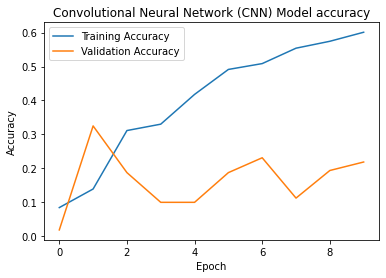

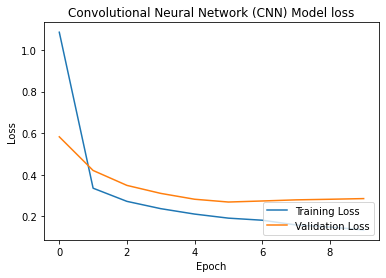

In [ ]:
#Plot Training & Validation Accuracy with the Loss values of the CNN Model

# Plot training & validation accuracy values
plt.plot(CNN_model_fit.history['accuracy'])
plt.plot(CNN_model_fit.history['val_accuracy'])
plt.title('Convolutional Neural Network (CNN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_model_fit.history['loss'])
plt.plot(CNN_model_fit.history['val_loss'])
plt.title('Convolutional Neural Network (CNN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

### LSTM without pre-trained embedding

In [ ]:
LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    LSTM(128, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(64, activation = 'relu'),
    Dense(20, activation = 'sigmoid')
])

LSTM_model.compile(loss='binary_crossentropy',
                   optimizer=Adam(0.01),
                   metrics=['accuracy', mean_pred, precision, recall, f1_m])
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 200, 128)          131584    
                                                                 
 batch_normalization_1 (Batc  (None, 200, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 200, 128)          0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)             

In [ ]:
LSTM_model_fit = LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
3/3 [==============================] - 7s 724ms/step - loss: 0.5560 - accuracy: 0.1558 - mean_pred: 0.2495 - precision: 0.1814 - recall: 0.3367 - f1_m: 0.1937 - val_loss: 0.6385 - val_accuracy: 0.2500 - val_mean_pred: 0.4683 - val_precision: 1.0000 - val_recall: 0.0385 - val_f1_m: 0.0741
Epoch 2/15
3/3 [==============================] - 0s 73ms/step - loss: 0.2811 - accuracy: 0.1892 - mean_pred: 0.0745 - precision: 0.3210 - recall: 0.0892 - f1_m: 0.1259 - val_loss: 0.6115 - val_accuracy: 0.1750 - val_mean_pred: 0.4521 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 73ms/step - loss: 0.2340 - accuracy: 0.3421 - mean_pred: 0.0867 - precision: 0.5827 - recall: 0.1769 - f1_m: 0.2651 - val_loss: 0.5911 - val_accuracy: 0.1750 - val_mean_pred: 0.4396 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 92ms/step - loss: 0.2127 

In [ ]:
# Evaluate the LSTM Model accuracy of our train and test accuracy

LSTM_train_score = LSTM_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Hasil Training Model LSTM:')
print('Train Loss:', LSTM_train_score[0])
print('Train Accuracy:', LSTM_train_score[1])
print('Train Precision:', LSTM_train_score[3])
print('Train Recall:', LSTM_train_score[4])
print('Train F1-Score:', LSTM_train_score[5])  

3/3 [==============================] - 0s 20ms/step - loss: 0.4900 - accuracy: 0.6416 - mean_pred: 0.3850 - precision: 0.9702 - recall: 0.5590 - f1_m: 0.7091
Hasil Training Model LSTM:
Train Loss: 0.49003225564956665
Train Accuracy: 0.6416275501251221
Train Precision: 0.9701980948448181
Train Recall: 0.5590400695800781
Train F1-Score: 0.7090914845466614


In [ ]:
LSTM_test_score = LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Hasil Testing Model LSTM:')
print('Test Loss:', LSTM_test_score[0])
print('Test Accuracy:', LSTM_test_score[1])
print('Test Precision:', LSTM_test_score[3])
print('Test Recall:', LSTM_test_score[4])
print('Test F1-Score:', LSTM_test_score[5])  

1/1 [==============================] - 0s 50ms/step - loss: 0.5026 - accuracy: 0.5300 - mean_pred: 0.3888 - precision: 0.8750 - recall: 0.3826 - f1_m: 0.5324
Hasil Testing Model LSTM:
Test Loss: 0.5026202201843262
Test Accuracy: 0.5299999713897705
Test Precision: 0.875
Test Recall: 0.3826366662979126
Test F1-Score: 0.5324384570121765


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#Predicting......
print('Predicting....')
y_pred = LSTM_model.predict(X_test,batch_size=batch_size2,verbose=1)

#F1-score result of LSTM
index=0
f1_score_LSTM = []
for category in categories:
  print(category)

  # finding best threshold 
  fpr, tpr, thresholds = roc_curve(test[category], y_pred[:, index])
  #auc = roc_auc_score(test[category], y_pred[:, index])
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)
  
  #print f1 score of each label
  print(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  f1_score_LSTM.append(f1_score(test[category], np.where(y_pred[:,index]<thresholds[ix],0,1)))
  index=+1

Predicting....
1/1 [==============================] - 1s 908ms/step
Pasien
0.7272727272727274
Usia Pasien
0.03571428571428572
Penyakit
0.5333333333333333
Gejala
0.30344827586206896
Kapan
0.35294117647058826
Periode
0.18181818181818182
Tindakan
0.4060150375939849
Outcome
0.2127659574468085
Pertanyaan
0.13793103448275862
Pembuka
0.04000000000000001
Penyebab
0.29931972789115646
Prakondisi
0.29007633587786263
Objek
0.11009174311926605
Penutup
0.08641975308641976
Referensi
0.03278688524590164
Artikel
0.07500000000000001
Observasi
0.048192771084337345
Kondisi
0.04444444444444444
Pengukuran
0.0
Predikat
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [ ]:
# Average f1-score for all labels by LSTM model
sum(f1_score_LSTM)/len(f1_score_LSTM)

0.19587858353720627

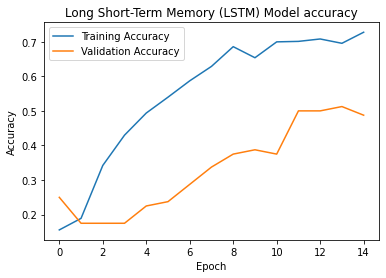

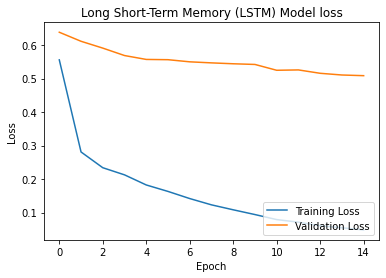

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the LSTM Model

# Plot training & validation accuracy values
plt.plot(LSTM_model_fit.history['accuracy'])
plt.plot(LSTM_model_fit.history['val_accuracy'])
plt.title('Long Short-Term Memory (LSTM) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training<<<<<<<<<<<<<<<<<<<
plt.plot(LSTM_model_fit.history['loss'])
plt.plot(LSTM_model_fit.history['val_loss'])
plt.title('Long Short-Term Memory (LSTM) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()    

### Hasil Without Pre-Trained Embedding

In [ ]:
# concat all training, validation and testing accuracy scores
CNN_Accuracy = ['CNN', 
                np.mean(CNN_model_fit.history['accuracy']), 
                np.mean(CNN_model_fit.history['val_accuracy']), 
                CNN_test_score[1]]

LSTM_Accuracy = ['LSTM', 
                  np.mean(LSTM_model_fit.history['accuracy']), 
                  np.mean(LSTM_model_fit.history['val_accuracy']), 
                  LSTM_test_score[1]]

# create dataframe
experimentalResult = pd.DataFrame([CNN_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([LSTM_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult

,Training Accuracy,Validation Accuracy,Testing Accuracy
Model,,,
CNN,0.401252,0.167500,0.245
LSTM,0.549096,0.333333,0.530


In [ ]:
CNN_Precision = ['CNN', 
                np.mean(CNN_model_fit.history['precision']), 
                np.mean(CNN_model_fit.history['val_precision']), 
                CNN_test_score[3]]

LSTM_Precision = ['LSTM', 
                np.mean(LSTM_model_fit.history['precision']), 
                np.mean(LSTM_model_fit.history['val_precision']), 
                LSTM_test_score[3]]

# create dataframe
experimentalResult = pd.DataFrame([CNN_Precision])
# append all other scores
experimentalResult = experimentalResult.append([LSTM_Precision])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Precision', 'Validation Precision', 'Testing Precision']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult              

,Training Precision,Validation Precision,Testing Precision
Model,,,
CNN,0.541276,0.003321,0.000
LSTM,0.751292,0.577715,0.875


In [ ]:
CNN_Recall = ['CNN', 
                np.mean(CNN_model_fit.history['recall']), 
                np.mean(CNN_model_fit.history['val_recall']), 
                CNN_test_score[4]]

LSTM_Recall = ['LSTM', 
                np.mean(LSTM_model_fit.history['recall']), 
                np.mean(LSTM_model_fit.history['val_recall']), 
                LSTM_test_score[4]]

# create dataframe
experimentalResult = pd.DataFrame([CNN_Recall])
# append all other scores
experimentalResult = experimentalResult.append([LSTM_Recall])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Recall', 'Validation Recall', 'Testing Recall']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult   

,Training Recall,Validation Recall,Testing Recall
Model,,,
CNN,0.342014,0.003644,0.000000
LSTM,0.524685,0.143077,0.382637


In [ ]:
CNN_F1Score = ['CNN', 
                np.mean(CNN_model_fit.history['f1_m']), 
                np.mean(CNN_model_fit.history['val_f1_m']), 
                CNN_test_score[5]]

LSTM_F1Score = ['LSTM', 
                np.mean(LSTM_model_fit.history['f1_m']), 
                np.mean(LSTM_model_fit.history['val_f1_m']), 
                LSTM_test_score[5]]

# create dataframe
experimentalResult = pd.DataFrame([CNN_F1Score])
# append all other scores
experimentalResult = experimentalResult.append([LSTM_F1Score])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training F1-Score', 'Validation F1-Score', 'Testing F1-Score']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult  

,Training F1-Score,Validation F1-Score,Testing F1-Score
Model,,,
CNN,0.395418,0.003475,0.000000
LSTM,0.592951,0.223353,0.532438


### Transfer Learning BERT Indonesia

In [ ]:
!pip install transformers
from transformers import BertTokenizer, TFBertModel

model_name='cahya/bert-base-indonesian-522M'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertModel.from_pretrained(model_name)
text = "Silakan diganti dengan text apa saja."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 20.5 MB/s 
     |████████████████████████████████| 7.6 MB 61.1 MB/s 
     |████████████████████████████████| 182 kB 83.4 MB/s 


Downloading:   0%|          | 0.00/230k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/468 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at cahya/bert-base-indonesian-522M.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    'cahya/bert-base-indonesian-522M', # Use the 12-layer BERT model, with an cased vocab.
    num_labels = 5, 
    output_attentions = False, # return attentions weights
    output_hidden_states = False, # returns all hidden-states
)

# Tell pytorch to run this model on the GPU.
model.cuda()
     

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-ba

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (32000, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

### BERT - CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding

print('Building BERT - CNN Model')
max_features = 5000
embedding_vector_length = 128

filters = 250
kernel_size = 3
hidden_dims = 125

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length))
#model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))
#model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', mean_pred, precision, recall, f1_m])

model.summary()

Building BERT - CNN Model
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         640000    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 250)         96250     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 125)               31375     
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dense_5 (Dense)             (None, 20)                2520      
                            

In [ ]:
BERT_CNN_model = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/20
80/80 [==============================] - 2s 10ms/step - loss: 0.3230 - accuracy: 0.2165 - mean_pred: 0.1662 - precision: 0.0196 - recall: 0.0344 - f1_m: 0.0227 - val_loss: 0.2230 - val_accuracy: 0.4200 - val_mean_pred: 0.0762 - val_precision: 0.1000 - val_recall: 0.0055 - val_f1_m: 0.0104
Epoch 2/20
80/80 [==============================] - 1s 6ms/step - loss: 0.2035 - accuracy: 0.4255 - mean_pred: 0.0805 - precision: 0.6614 - recall: 0.1700 - f1_m: 0.2615 - val_loss: 0.1877 - val_accuracy: 0.4900 - val_mean_pred: 0.0793 - val_precision: 0.8315 - val_recall: 0.2333 - val_f1_m: 0.3568
Epoch 3/20
80/80 [==============================] - 1s 6ms/step - loss: 0.1642 - accuracy: 0.5607 - mean_pred: 0.0800 - precision: 0.8293 - recall: 0.3625 - f1_m: 0.4917 - val_loss: 0.1632 - val_accuracy: 0.6050 - val_mean_pred: 0.0675 - val_precision: 0.8183 - val_recall: 0.3699 - val_f1_m: 0.4998
Epoch 4/20
80/80 [==============================] - 1s 7ms/step - loss: 0.1283 - accuracy: 0.6596 -

In [ ]:
# train
BERT_CNN_train_score = model.evaluate(X_train, y_train)
print('Hasil Training Model BERT CNN:')
print('Train Loss:', BERT_CNN_train_score[0])
print('Train Accuracy:', BERT_CNN_train_score[1])
print('Train Precision:', BERT_CNN_train_score[3])
print('Train Recall:', BERT_CNN_train_score[4])
print('Train F1-Score:', BERT_CNN_train_score[5]) 

# test
BERT_CNN_test_score = model.evaluate(X_test, y_test)
print('Hasil Testing Model BERT CNN:')
print('Test Loss:', BERT_CNN_test_score[0])
print('Test Accuracy:', BERT_CNN_test_score[1])
print('Test Precision:', BERT_CNN_test_score[3])
print('Test Recall:', BERT_CNN_test_score[4])
print('Test F1-Score:', BERT_CNN_test_score[5]) 

25/25 [==============================] - 1s 7ms/step - loss: 0.0029 - accuracy: 0.7434 - mean_pred: 0.0786 - precision: 0.9978 - recall: 0.9931 - f1_m: 0.9954
Hasil Training Model BERT CNN:
Train Loss: 0.0028638234362006187
Train Accuracy: 0.7434293031692505
Train Precision: 0.9977614879608154
Train Recall: 0.9930692315101624
Train F1-Score: 0.9953832030296326
7/7 [==============================] - 0s 8ms/step - loss: 0.2111 - accuracy: 0.6200 - mean_pred: 0.0658 - precision: 0.7882 - recall: 0.6468 - f1_m: 0.7071
Hasil Testing Model BERT CNN:
Test Loss: 0.21111604571342468
Test Accuracy: 0.6200000047683716
Test Precision: 0.7882270216941833
Test Recall: 0.6467877626419067
Test F1-Score: 0.7071113586425781


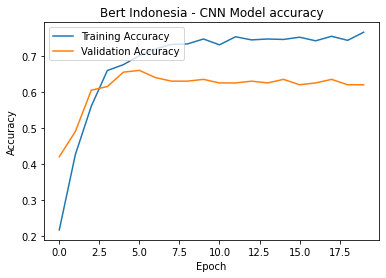

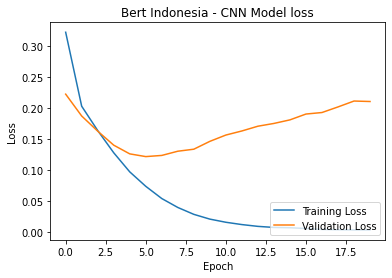

In [ ]:
# Plot Training & Validation Accuracy with the Loss values of the Bil GRU Model

# Plot training & validation accuracy values
plt.plot(BERT_CNN_model.history['accuracy'])
plt.plot(BERT_CNN_model.history['val_accuracy'])
plt.title('Bert Indonesia - CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(BERT_CNN_model.history['loss'])
plt.plot(BERT_CNN_model.history['val_loss'])
plt.title('Bert Indonesia - CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

### BERT - LSTM

In [ ]:
print('Building BERT - LSTM Model')

embedding_vector_length = 128

model = Sequential()
model.add(Embedding(input_dim=512, output_dim=512))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(20, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', mean_pred, precision, recall, f1_m])

model.summary()

Building BERT - LSTM Model
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 512)         262144    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, None, 512)        0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               245200    
                                                                 
 dense_6 (Dense)             (None, 20)                2020      
                                                                 
Total params: 509,364
Trainable params: 509,364
Non-trainable params: 0
_________________________________________________________________


In [ ]:
BERT_LSTM_model = model.fit(X_train, y_train,
                    epochs=20,
                    # verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

# plot_history(BERT_LSTM_model)

Epoch 1/20
80/80 [==============================] - 8s 45ms/step - loss: 0.2890 - accuracy: 0.2378 - mean_pred: 0.1376 - precision: 0.0068 - recall: 0.0174 - f1_m: 0.0087 - val_loss: 0.2167 - val_accuracy: 0.2850 - val_mean_pred: 0.0758 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/20
80/80 [==============================] - 2s 23ms/step - loss: 0.2107 - accuracy: 0.3517 - mean_pred: 0.0814 - precision: 0.4479 - recall: 0.0862 - f1_m: 0.1380 - val_loss: 0.2002 - val_accuracy: 0.4300 - val_mean_pred: 0.0771 - val_precision: 0.7358 - val_recall: 0.0840 - val_f1_m: 0.1462
Epoch 3/20
80/80 [==============================] - 2s 21ms/step - loss: 0.1890 - accuracy: 0.5031 - mean_pred: 0.0834 - precision: 0.6818 - recall: 0.1794 - f1_m: 0.2733 - val_loss: 0.1849 - val_accuracy: 0.5300 - val_mean_pred: 0.0778 - val_precision: 0.7227 - val_recall: 0.2350 - val_f1_m: 0.3445
Epoch 4/20
80/80 [==============================] - 2s 21ms/step - loss: 0.1694 - acc

In [ ]:
# train
BERT_LSTM_train_score = model.evaluate(X_train, y_train)
print('Hasil Training Model BERT LSTM:')
print('Train Loss:', BERT_LSTM_train_score[0])
print('Train Accuracy:', BERT_LSTM_train_score[1])
print('Train Precision:', BERT_LSTM_train_score[3])
print('Train Recall:', BERT_LSTM_train_score[4])
print('Train F1-Score:', BERT_LSTM_train_score[5]) 

# test
BERT_LSTM_test_score = model.evaluate(X_test, y_test)
print('Hasil Testing Model BERT LSTM:')
print('Test Loss:', BERT_LSTM_test_score[0])
print('Test Accuracy:', BERT_LSTM_test_score[1])
print('Test Precision:', BERT_LSTM_test_score[3])
print('Test Recall:', BERT_LSTM_test_score[4])
print('Test F1-Score:', BERT_LSTM_test_score[5]) 

25/25 [==============================] - 1s 7ms/step - loss: 0.0314 - accuracy: 0.7184 - mean_pred: 0.0808 - precision: 0.9831 - recall: 0.9285 - f1_m: 0.9546
Hasil Training Model BERT LSTM:
Train Loss: 0.031430721282958984
Train Accuracy: 0.7183979749679565
Train Precision: 0.9830670952796936
Train Recall: 0.9284551739692688
Train F1-Score: 0.9546290040016174
7/7 [==============================] - 0s 8ms/step - loss: 0.1800 - accuracy: 0.5400 - mean_pred: 0.0774 - precision: 0.6819 - recall: 0.5739 - f1_m: 0.6134
Hasil Testing Model BERT LSTM:
Test Loss: 0.18002058565616608
Test Accuracy: 0.5400000214576721
Test Precision: 0.6818674206733704
Test Recall: 0.573908805847168
Test F1-Score: 0.6134058833122253


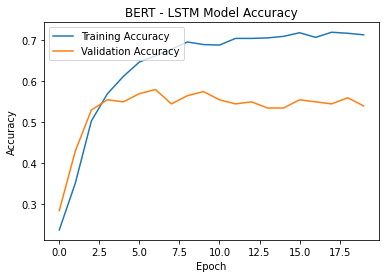

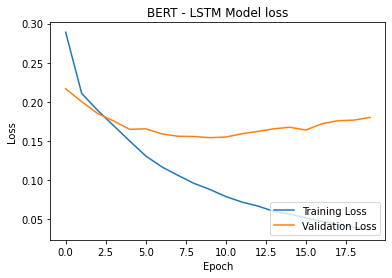

In [ ]:
plt.plot(BERT_LSTM_model.history['accuracy'])
plt.plot(BERT_LSTM_model.history['val_accuracy'])
plt.title('BERT - LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(BERT_LSTM_model.history['loss'])
plt.plot(BERT_LSTM_model.history['val_loss'])
plt.title('BERT - LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

### BERT - CNN LSTM

In [ ]:
print('Building BERT - CNN LSTM Model')

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(20, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', mean_pred, precision, recall, f1_m])

model.summary()

Building BERT - CNN LSTM Model
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          160000    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_7 (Dense)             (None, 20)                2020      
                                                                 
Total params: 218,324
Trainable params: 218,324
Non-trainable params: 0
_________________

In [ ]:
# Train
BERT_CNN_LSTM_model = model.fit(X_train, y_train,
                    epochs=20,
                    # verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))

# plot_history(BERT_CNN_LSTM_model)

Epoch 1/20
80/80 [==============================] - 4s 19ms/step - loss: 0.3146 - accuracy: 0.2103 - mean_pred: 0.1618 - precision: 0.0354 - recall: 0.0547 - f1_m: 0.0402 - val_loss: 0.2241 - val_accuracy: 0.2650 - val_mean_pred: 0.0804 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/20
80/80 [==============================] - 1s 11ms/step - loss: 0.2272 - accuracy: 0.2678 - mean_pred: 0.0793 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.2232 - val_accuracy: 0.2650 - val_mean_pred: 0.0817 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/20
80/80 [==============================] - 1s 11ms/step - loss: 0.2165 - accuracy: 0.3066 - mean_pred: 0.0796 - precision: 0.1000 - recall: 0.0066 - f1_m: 0.0123 - val_loss: 0.2073 - val_accuracy: 0.3700 - val_mean_pred: 0.0831 - val_precision: 0.6208 - val_recall: 0.0807 - val_f1_m: 0.1380
Epoch 4/20
80/80 [==============================] - 1s 11ms/s

In [ ]:
# train
BERT_CNN_LSTM_train_score = model.evaluate(X_train, y_train)
print('Hasil Training Model BERT CNN LSTM:')
print('Train Loss:', BERT_CNN_LSTM_train_score[0])
print('Train Accuracy:', BERT_CNN_LSTM_train_score[1])
print('Train Precision:', BERT_CNN_LSTM_train_score[3])
print('Train Recall:', BERT_CNN_LSTM_train_score[4])
print('Train F1-Score:', BERT_CNN_LSTM_train_score[5]) 

# test
BERT_CNN_LSTM_test_score = model.evaluate(X_test, y_test)
print('Hasil Testing Model BERT CNN LSTM:')
print('Test Loss:', BERT_CNN_LSTM_test_score[0])
print('Test Accuracy:', BERT_CNN_LSTM_test_score[1])
print('Test Precision:', BERT_CNN_LSTM_test_score[3])
print('Test Recall:', BERT_CNN_LSTM_test_score[4])
print('Test F1-Score:', BERT_CNN_LSTM_test_score[5]) 

25/25 [==============================] - 1s 8ms/step - loss: 0.0533 - accuracy: 0.7685 - mean_pred: 0.0815 - precision: 0.9607 - recall: 0.8537 - f1_m: 0.9032
Hasil Training Model BERT CNN LSTM:
Train Loss: 0.053265996277332306
Train Accuracy: 0.7684605717658997
Train Precision: 0.9606728553771973
Train Recall: 0.8536948561668396
Train F1-Score: 0.903167724609375
7/7 [==============================] - 0s 10ms/step - loss: 0.2220 - accuracy: 0.4700 - mean_pred: 0.0769 - precision: 0.5523 - recall: 0.4076 - f1_m: 0.4659
Hasil Testing Model BERT CNN LSTM:
Test Loss: 0.22204142808914185
Test Accuracy: 0.4699999988079071
Test Precision: 0.5523365139961243
Test Recall: 0.40762263536453247
Test F1-Score: 0.46588584780693054


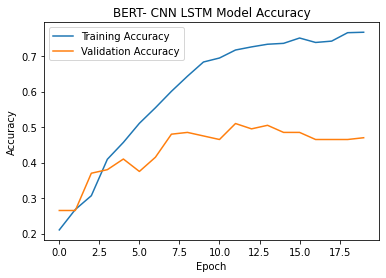

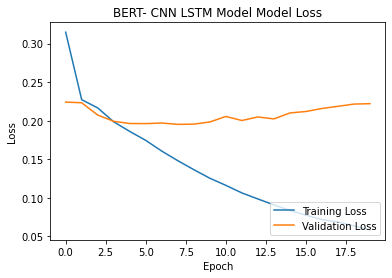

In [ ]:
plt.plot(BERT_CNN_LSTM_model.history['accuracy'])
plt.plot(BERT_CNN_LSTM_model.history['val_accuracy'])
plt.title('BERT- CNN LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(BERT_CNN_LSTM_model.history['loss'])
plt.plot(BERT_CNN_LSTM_model.history['val_loss'])
plt.title('BERT- CNN LSTM Model Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

### Hasil pre-trained Embedding

In [ ]:
# concat all training, validation and testing accuracy scores
BERT_CNN_Accuracy = ['BERT - CNN', 
                np.mean(BERT_CNN_model.history['accuracy']), 
                np.mean(BERT_CNN_model.history['val_accuracy']), 
                BERT_CNN_test_score[1]]

BERT_LSTM_Accuracy = ['BERT - LSTM', 
                  np.mean(BERT_LSTM_model.history['accuracy']), 
                  np.mean(BERT_LSTM_model.history['val_accuracy']), 
                  BERT_LSTM_test_score[1]]

BERT_CNN_LSTM_Accuracy = ['BERT - CNN LSTM', 
                  np.mean(BERT_CNN_LSTM_model.history['accuracy']), 
                  np.mean(BERT_CNN_LSTM_model.history['val_accuracy']), 
                  BERT_CNN_LSTM_test_score[1]]

# create dataframe
experimentalResult = pd.DataFrame([BERT_CNN_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([BERT_LSTM_Accuracy, BERT_CNN_LSTM_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult

,Training Accuracy,Validation Accuracy,Testing Accuracy
Model,,,
BERT - CNN,0.682603,0.61200,0.62
BERT - LSTM,0.636796,0.53275,0.54
BERT - CNN LSTM,0.600751,0.43650,0.47


In [ ]:
# concat all training, validation and testing prec scores
BERT_CNN_Precision = ['BERT - CNN', 
                np.mean(BERT_CNN_model.history['precision']), 
                np.mean(BERT_CNN_model.history['val_precision']), 
                BERT_CNN_test_score[3]]

BERT_LSTM_Precision = ['BERT - LSTM', 
                  np.mean(BERT_LSTM_model.history['precision']), 
                  np.mean(BERT_LSTM_model.history['val_precision']), 
                  BERT_LSTM_test_score[3]]

BERT_CNN_LSTM_Precision = ['BERT - CNN LSTM', 
                  np.mean(BERT_CNN_LSTM_model.history['precision']), 
                  np.mean(BERT_CNN_LSTM_model.history['val_precision']), 
                  BERT_CNN_LSTM_test_score[3]]

# create dataframe
experimentalResult = pd.DataFrame([BERT_CNN_Precision])
# append all other scores
experimentalResult = experimentalResult.append([BERT_LSTM_Precision, BERT_CNN_LSTM_Precision])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Precision', 'Validation Precision', 'Testing Precision']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult

,Training Precision,Validation Precision,Testing Precision
Model,,,
BERT - CNN,0.902959,0.785756,0.788227
BERT - LSTM,0.840743,0.687702,0.681867
BERT - CNN LSTM,0.754176,0.533896,0.552337


In [ ]:
# concat all training, validation and testing rec scores
BERT_CNN_Recall = ['BERT - CNN', 
                np.mean(BERT_CNN_model.history['recall']), 
                np.mean(BERT_CNN_model.history['val_recall']), 
                BERT_CNN_test_score[4]]

BERT_LSTM_Recall = ['BERT - LSTM', 
                  np.mean(BERT_LSTM_model.history['recall']), 
                  np.mean(BERT_LSTM_model.history['val_recall']), 
                  BERT_LSTM_test_score[4]]

BERT_CNN_LSTM_Recall = ['BERT - CNN LSTM', 
                  np.mean(BERT_CNN_LSTM_model.history['recall']), 
                  np.mean(BERT_CNN_LSTM_model.history['val_recall']), 
                  BERT_CNN_LSTM_test_score[4]]

# create dataframe
experimentalResult = pd.DataFrame([BERT_CNN_Recall])
# append all other scores
experimentalResult = experimentalResult.append([BERT_LSTM_Recall, BERT_CNN_LSTM_Recall])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Recall', 'Validation Recall', 'Testing Recall']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult

,Training Recall,Validation Recall,Testing Recall
Model,,,
BERT - CNN,0.795159,0.578139,0.646788
BERT - LSTM,0.624558,0.431819,0.573909
BERT - CNN LSTM,0.477896,0.277629,0.407623


In [ ]:
# concat all training, validation and testing rec scores
BERT_CNN_F1Score = ['BERT - CNN', 
                np.mean(BERT_CNN_model.history['f1_m']), 
                np.mean(BERT_CNN_model.history['val_f1_m']), 
                BERT_CNN_test_score[5]]

BERT_LSTM_F1Score = ['BERT - LSTM', 
                  np.mean(BERT_LSTM_model.history['f1_m']), 
                  np.mean(BERT_LSTM_model.history['val_f1_m']), 
                  BERT_LSTM_test_score[5]]

BERT_CNN_LSTM_F1Score = ['BERT - CNN LSTM', 
                  np.mean(BERT_CNN_LSTM_model.history['f1_m']), 
                  np.mean(BERT_CNN_LSTM_model.history['val_f1_m']), 
                  BERT_CNN_LSTM_test_score[5]]

# create dataframe
experimentalResult = pd.DataFrame([BERT_CNN_F1Score])
# append all other scores
experimentalResult = experimentalResult.append([BERT_LSTM_F1Score, BERT_CNN_LSTM_F1Score])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training F1-Score', 'Validation F1-Score', 'Testing F1-Score']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult

,Training F1-Score,Validation F1-Score,Testing F1-Score
Model,,,
BERT - CNN,0.829956,0.649463,0.707111
BERT - LSTM,0.696324,0.507557,0.613406
BERT - CNN LSTM,0.564531,0.346788,0.465886
